# Sentiment Analysis 1

## Table of Contents:
Twitter Analysis of the Russian-Ukraine Crisis
  * Data Preprocessing
  * EDA
  * Feature Extraction
  * ML Model Predictions
  * Cross Validation
  * Evaluation

### Import Libraries

In [43]:
# For dataframes


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Importing all nltk related libraries
# !pip install nltk
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('all')
nltk.download('vader_lexicon')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# !pip install scikit-learn

from sklearn.linear_model import LogisticRegression

# Subjectivity and Polarity
# !pip install textblob
from textblob import TextBlob

# Regular Expressions
import re
import string

# Bag of Words representation
import collections
from sklearn.feature_extraction.text import CountVectorizer

# Wordcloud
# !pip install wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# To ignore warning
import warnings
warnings.filterwarnings("ignore")

# Emotion
# !pip install nrclex
from nrclex import NRCLex

# Mime type rendering
# !pip install nbformat
import nbformat

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\Admin\AppData\Roaming\nltk_data...
[

In [44]:
# Set Pandas truncation of long strings
pd.set_option('display.max_colwidth', 1000)

### Import Data

In [45]:
data_sentiment = pd.read_csv('datasets/ukrainerussian_tweets.csv')

In [46]:
data_sentiment.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1590510105598259201,1590510105598259201,2022-11-10 01:02:14 UTC,2022-11-10,01:02:14,0,1162601483856039936,sumanth09315243,WAGMIFestival.eth,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1590510093610909698,1589760170938470400,2022-11-10 01:02:11 UTC,2022-11-10,01:02:11,0,1085482994176012288,liberalismisco1,Liberalism is Cool,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'bjovan3', 'name': '🇷🇸 مها', 'id': '710383228805320704'}, {'screen_name': 'KimDotcom', 'name': 'Kim Dotcom', 'id': '611986351'}]",NaN,NaN,NaN,NaN
2,1590510091157274624,1590035806433210368,2022-11-10 01:02:10 UTC,2022-11-10,01:02:10,0,19697793,crypto_knight_3,Big Phil 🍥,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'Trollstoy88', 'name': 'Trollstoy', 'id': '1487069808818544646'}]",NaN,NaN,NaN,NaN
3,1590510084802883584,1590510084802883584,2022-11-10 01:02:09 UTC,2022-11-10,01:02:09,0,3627349575,engineer_psych,Dark6Light,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1590510082969989120,1590508019862843392,2022-11-10 01:02:08 UTC,2022-11-10,01:02:08,0,1541625790634270720,deonrichar1,The In Your Face Show W/Dion DB😅🤗🇺🇸⚖️🕙🙏✨,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'hrkbenowen', 'name': 'Ben Owen 🇺🇸', 'id': '542962969'}]",NaN,NaN,NaN,NaN


### Explanation on what we are looking out for:
* What are we trying to tackle?
  *  Indulge in such a topic where we analyse the emotions of the general public as tensions
continued to arise between Russian and Ukraine supporters. Therefore, we are doing sentiment analysis on
the Ukraine-Russia War on Twitter.
* Objectives:
  * Identify the mental state of the general public based on the comments extracted from the tweets on Twitter
  * Understand how this conflict has affected the general public using sentiment analysis
  * Data Source: https://www.kaggle.com/datasets/towhidultonmoy/russia-vs-ukraine-tweets-datasetdaily-updated

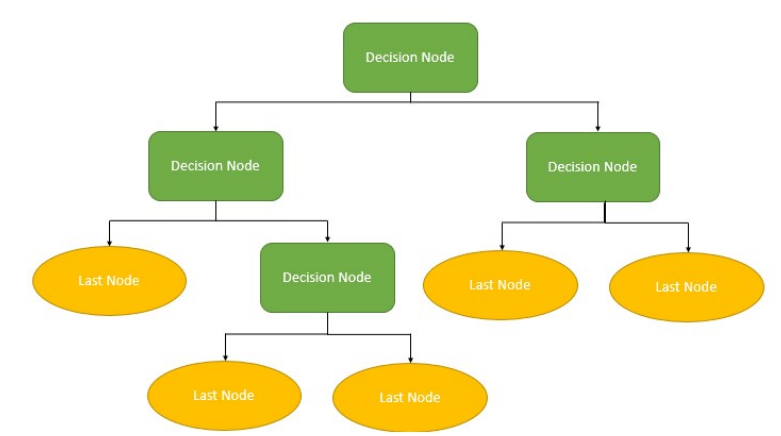


### Inspect the data & Explore Data

In [47]:
# Retrieve all the columns within the dataframe
data_sentiment.columns

Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [48]:
# View the trpes of data collected in each column of the data frame
data_sentiment.dtypes

id                   int64
conversation_id      int64
created_at          object
date                object
time                object
timezone             int64
user_id              int64
username            object
name                object
place               object
tweet               object
language            object
mentions            object
urls                object
photos              object
replies_count        int64
retweets_count       int64
likes_count          int64
hashtags            object
cashtags            object
link                object
retweet               bool
quote_url           object
video                int64
thumbnail           object
near               float64
geo                float64
source             float64
user_rt_id         float64
user_rt            float64
retweet_id         float64
reply_to            object
retweet_date       float64
translate          float64
trans_src          float64
trans_dest         float64
dtype: object

In [49]:
# The main set of data we will be preprocessing for detecting emotions -> Tweet column
data_sentiment['tweet']

0                                                                                                                @jensstoltenberg Nato/otan is the most terrorist organization in the world , there members are only white. The unipolar way is over now is multi     and russia and china are the new order
1                                                                                                                     @bjovan3 @KimDotcom You’re talking as if it was Ukraine that invaded Russia and was trying to seize the capital. Are you sure you’re not confusing the two countries with one another?
2                                                                                                                                                                                                                                       @Trollstoy88 Bet russia wishes it hadnt wasted them all in syria now
3                                                                                                

In [50]:
# Extracting columns required to perform sentiment analysis
df_tweets1 = pd.DataFrame({'tweet': pd.Series(data_sentiment['tweet']),
                          'language': pd.Series(data_sentiment['language'])})

In [51]:
df_tweets = data_sentiment[['tweet', 'language']]

In [52]:
df_tweets.equals(df_tweets1)

True

### EDA

In [53]:
df_tweets['length'] = df_tweets['tweet'].apply(len)

In [54]:
df_tweets.head()

,tweet,language,length
0,"@jensstoltenberg Nato/otan is the most terrorist organization in the world , there members are only white. The unipolar way is over now is multi and russia and china are the new order",en,187
1,@bjovan3 @KimDotcom You’re talking as if it was Ukraine that invaded Russia and was trying to seize the capital. Are you sure you’re not confusing the two countries with one another?,en,182
2,@Trollstoy88 Bet russia wishes it hadnt wasted them all in syria now,en,68
3,On the last meeting Lukashenko and Putin talking about respect thst west should respect us then we can negotiate (here we have Stoltenberg show respect to Russia:) https://t.co/e0ptJTwh6g,en,189
4,@hrkbenowen Why wouldn't he be? Russia (not that I'm a #putinpuppet) ain't playin' out here! Steamroll Season#7...😉,en,115


### Plot a bar graph to show the distribution of the top 5 languages reflected in the twitter dataset

In [55]:
# Printing out unique row data in the langauge column
print(df_tweets['language'].unique())

['en' 'qme' 'pt' 'nl' 'it' 'ca' 'in' 'und' 'ta' 'ja' 'fr' 'zh' 'vi' 'ro'
 'th' 'de' 'ht' 'es' 'qht' 'ur' 'ru' 'fi' 'ar' 'cs' 'pl' 'hi' 'tl' 'tr'
 'no' 'et' 'uk' 'el' 'da' 'qam' 'iw' 'sv' 'lt' 'bg']


In [56]:
# Counting the number of each language type using value_counts() function
df_tweets['language'].value_counts()

language
en     8793
pt      343
it      232
qme     138
und      80
in       54
th       53
es       38
vi       37
ru       36
ca       34
de       27
ja       26
fr       25
nl       13
ar       11
qht       9
fi        8
pl        6
zh        5
ro        5
cs        4
tl        4
et        4
uk        4
hi        4
no        2
qam       2
ht        2
tr        2
ur        1
ta        1
el        1
da        1
iw        1
sv        1
lt        1
bg        1
Name: count, dtype: int64

<Axes: xlabel='language'>

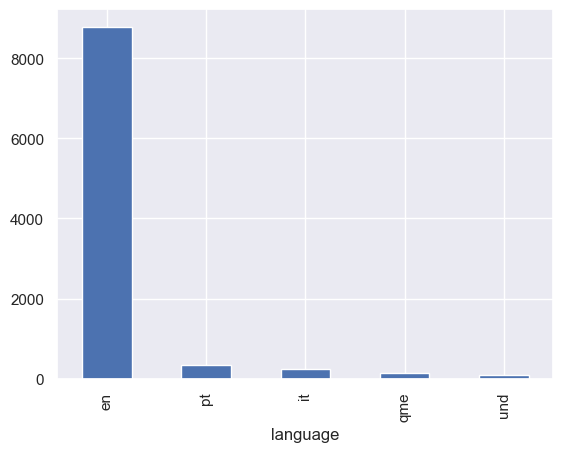

In [57]:
df_tweets['language'].value_counts()[0:5].plot(kind = 'bar')


In [58]:
# Choosing top 5 language
top5_lang = df_tweets['language'].value_counts()[0:5]

<Axes: xlabel='language'>

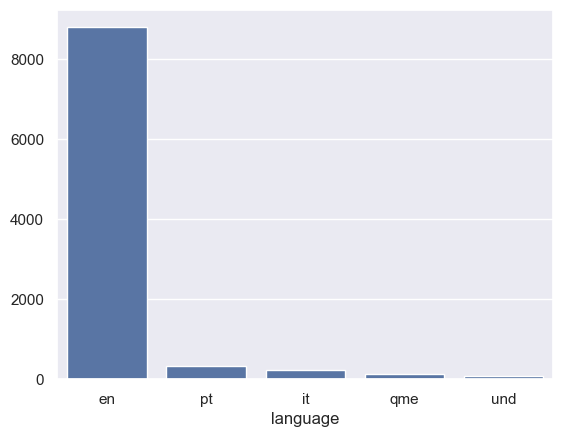

In [59]:
# Plotting the Bar Graph
# Setting theme for the sns background
sns.set_theme(style='darkgrid')
# Plot bar graph using barplot() function
sns.barplot(x=top5_lang.index , y =top5_lang.values )

### Data Cleaning
We will now be taking the tweet data that are in english language

In [60]:
en_tweet = df_tweets.query('language == "en"').reset_index() #will reset the tweet index 

In [61]:
en_tweet

,index,tweet,language,length
0,0,"@jensstoltenberg Nato/otan is the most terrorist organization in the world , there members are only white. The unipolar way is over now is multi and russia and china are the new order",en,187
1,1,@bjovan3 @KimDotcom You’re talking as if it was Ukraine that invaded Russia and was trying to seize the capital. Are you sure you’re not confusing the two countries with one another?,en,182
2,2,@Trollstoy88 Bet russia wishes it hadnt wasted them all in syria now,en,68
3,3,On the last meeting Lukashenko and Putin talking about respect thst west should respect us then we can negotiate (here we have Stoltenberg show respect to Russia:) https://t.co/e0ptJTwh6g,en,189
4,4,@hrkbenowen Why wouldn't he be? Russia (not that I'm a #putinpuppet) ain't playin' out here! Steamroll Season#7...😉,en,115
...,...,...,...,...
8788,10004,Ukraine has won the war. Russia is leaving Ukraine after heavy losses and humiliation.,en,86
8789,10005,"Biden says it remains to be seen if the Kherson withdrawal will lead to some ""recalibration of positions"" over the winter and if Ukraine will be willing to compromise with Russia.",en,179
8790,10006,"Talks with Russia? No way, say Ukrainians | Russia-Ukraine war News | Al Jazeera https://t.co/L6Eh1ps5SF via @AJEnglish",en,120
8791,10007,@DylanBurns1776 Supporting kurds to sow division in Iran and Syria and Iraq is ok since it's not Russia that's doing it,en,119


In [62]:
# Setting lemmatize and stopword variable
lemmatizer = WordNetLemmatizer()
stopword = set(stopwords.words('english'))


In [63]:
# Processing Tweet data
def tweet_processor(tweet_data):
  tweet_data = tweet_data.lower() #converting to lowercase
  # Removes any content that is in the format is "[example_text]" eg. links
  tweet_data = re.sub('\[.*?\]', '', tweet_data)
  # Remove any text that is not lowercased
  tweet_data = re.sub("[^a-z\s]", "", tweet_data)
  return(tweet_data)

In [64]:
# Apply the tweet_processor to the first row
df_tweets['tweet'][:1].apply(tweet_processor)

0    jensstoltenberg natootan is the most terrorist organization in the world  there members are only white the unipolar way is over now is multi     and russia and china are the new order
Name: tweet, dtype: object

In [65]:
# Processing Tweet data in more detail
def tweet_processor(tweet_data):
  # Changing all tweet texts to be lowercase
  tweet_data = tweet_data.lower()

  # Removing punctuation
  tweet_data = re.sub('\[.*?\]', '', tweet_data)

  # Removing special characters and numbers
  tweet_data = re.sub("[^a-z\s]", "", tweet_data)

  # Removing hashtags
  tweet_data = re.sub("#", " ", tweet_data)

  # Removing RT
  tweet_data = re.sub("RT[\s]+", "", tweet_data)

  # Removing hyperlinks
  tweet_data = re.sub('https?://\S+|www\.\S+', '', tweet_data)

  tweet_data = re.sub('<.*?>+', '', tweet_data) #remove line spacing

  tweet_data = re.sub('[%s]' % re.escape(string.punctuation), '', tweet_data)

  # Removing lines separated by \n
  tweet_data = re.sub('\n', '', tweet_data)

  # Removing usernames
  tweet_data = re.sub('\w*\d\w*', '', tweet_data)

  # Removing stopwords
  tweet_data = [word for word in tweet_data.split(' ') if word not in stopword]
  tweet_data = " ".join(tweet_data)

  # Lemmatisation
  tweet_data = [lemmatizer.lemmatize(word) for word in tweet_data.split(' ')] #split with a space
  tweet_data = " ".join(tweet_data)
  # tweet_data = ",".join([str(i) for i in tweet_data])
  return tweet_data

In [66]:
# Copying dataframe and storing it in a new dataframe
processed_tweet_data = df_tweets.copy()

In [67]:
# Applying the tweet_processor function created
processed_tweet_data['Reviewed_Tweet'] = df_tweets['tweet'].apply(tweet_processor) #create a new column and apply the processor

In [68]:
# Displaying processed tweet data
processed_tweet_data['Reviewed_Tweet']

0                                                                        jensstoltenberg natootan terrorist organization world  member white unipolar way multi     russia china new order
1                                                                  bjovan kimdotcom youre talking ukraine invaded russia trying seize capital sure youre confusing two country one another
2                                                                                                                                             trollstoy bet russia wish hadnt wasted syria
3                                                           last meeting lukashenko putin talking respect thst west respect u negotiate stoltenberg show respect russia   httpstcoeptjtwhg
4                                                                                                                    hrkbenowen wouldnt russia im putinpuppet aint playin steamroll season
                                                                 

### More EDA

In [69]:
# Subjectivity of the processed data from 0 to 1, 0 means neutral/facts, 1 means personal opinion
# Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity



In [70]:
# Polarity of the processed data from -1 to 1, -1 means negative, 0 means neutral, 1 means positive
# Create a function to get the polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity


In [71]:
# Creating columns to display subjectivity and polarity
processed_tweet_data['Subjectivity'] = processed_tweet_data['Reviewed_Tweet'].apply(getSubjectivity)
processed_tweet_data['Polarity'] = processed_tweet_data['Reviewed_Tweet'].apply(getPolarity)


In [72]:
processed_tweet_data

,tweet,language,length,Reviewed_Tweet,Subjectivity,Polarity
0,"@jensstoltenberg Nato/otan is the most terrorist organization in the world , there members are only white. The unipolar way is over now is multi and russia and china are the new order",en,187,jensstoltenberg natootan terrorist organization world member white unipolar way multi russia china new order,0.227273,0.068182
1,@bjovan3 @KimDotcom You’re talking as if it was Ukraine that invaded Russia and was trying to seize the capital. Are you sure you’re not confusing the two countries with one another?,en,182,bjovan kimdotcom youre talking ukraine invaded russia trying seize capital sure youre confusing two country one another,0.644444,0.100000
2,@Trollstoy88 Bet russia wishes it hadnt wasted them all in syria now,en,68,trollstoy bet russia wish hadnt wasted syria,0.000000,-0.200000
3,On the last meeting Lukashenko and Putin talking about respect thst west should respect us then we can negotiate (here we have Stoltenberg show respect to Russia:) https://t.co/e0ptJTwh6g,en,189,last meeting lukashenko putin talking respect thst west respect u negotiate stoltenberg show respect russia httpstcoeptjtwhg,0.066667,0.000000
4,@hrkbenowen Why wouldn't he be? Russia (not that I'm a #putinpuppet) ain't playin' out here! Steamroll Season#7...😉,en,115,hrkbenowen wouldnt russia im putinpuppet aint playin steamroll season,0.000000,0.000000
...,...,...,...,...,...,...
10004,Ukraine has won the war. Russia is leaving Ukraine after heavy losses and humiliation.,en,86,ukraine war russia leaving ukraine heavy loss humiliation,0.500000,-0.200000
10005,"Biden says it remains to be seen if the Kherson withdrawal will lead to some ""recalibration of positions"" over the winter and if Ukraine will be willing to compromise with Russia.",en,179,biden say remains seen kherson withdrawal lead recalibration position winter ukraine willing compromise russia,0.750000,0.250000
10006,"Talks with Russia? No way, say Ukrainians | Russia-Ukraine war News | Al Jazeera https://t.co/L6Eh1ps5SF via @AJEnglish",en,120,talk russia way say ukrainian russiaukraine war news al jazeera httpstcolehpssf via ajenglish,0.000000,0.000000
10007,@DylanBurns1776 Supporting kurds to sow division in Iran and Syria and Iraq is ok since it's not Russia that's doing it,en,119,dylanburns supporting kurd sow division iran syria iraq ok since russia thats,0.375000,0.375000


### Word Cloud

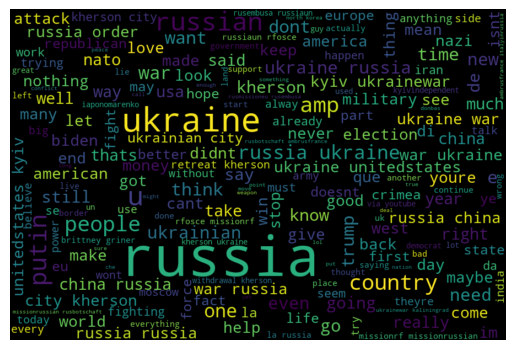

In [73]:
allTweets = ' '.join([tweets for tweets in processed_tweet_data['Reviewed_Tweet']]) #combining all the tweet into one variable
RU_wordcloud=WordCloud(width=900, height=600, random_state=21, max_font_size=100).generate(allTweets) #creates the visual
plt.imshow(RU_wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

### Computing negative, neutral and positive analysis

In [74]:
def getComputation(score):
    if score < -0.5:
        return "very negative"
    if score < 0:
        return "negative"
    elif score == 0:
        return "neutral"
    elif score >0:
        return "positive"
processed_tweet_data['Computational_Analysis'] = processed_tweet_data['Polarity'].apply(getComputation)










In [75]:
processed_tweet_data

,tweet,language,length,Reviewed_Tweet,Subjectivity,Polarity,Computational_Analysis
0,"@jensstoltenberg Nato/otan is the most terrorist organization in the world , there members are only white. The unipolar way is over now is multi and russia and china are the new order",en,187,jensstoltenberg natootan terrorist organization world member white unipolar way multi russia china new order,0.227273,0.068182,positive
1,@bjovan3 @KimDotcom You’re talking as if it was Ukraine that invaded Russia and was trying to seize the capital. Are you sure you’re not confusing the two countries with one another?,en,182,bjovan kimdotcom youre talking ukraine invaded russia trying seize capital sure youre confusing two country one another,0.644444,0.100000,positive
2,@Trollstoy88 Bet russia wishes it hadnt wasted them all in syria now,en,68,trollstoy bet russia wish hadnt wasted syria,0.000000,-0.200000,negative
3,On the last meeting Lukashenko and Putin talking about respect thst west should respect us then we can negotiate (here we have Stoltenberg show respect to Russia:) https://t.co/e0ptJTwh6g,en,189,last meeting lukashenko putin talking respect thst west respect u negotiate stoltenberg show respect russia httpstcoeptjtwhg,0.066667,0.000000,neutral
4,@hrkbenowen Why wouldn't he be? Russia (not that I'm a #putinpuppet) ain't playin' out here! Steamroll Season#7...😉,en,115,hrkbenowen wouldnt russia im putinpuppet aint playin steamroll season,0.000000,0.000000,neutral
...,...,...,...,...,...,...,...
10004,Ukraine has won the war. Russia is leaving Ukraine after heavy losses and humiliation.,en,86,ukraine war russia leaving ukraine heavy loss humiliation,0.500000,-0.200000,negative
10005,"Biden says it remains to be seen if the Kherson withdrawal will lead to some ""recalibration of positions"" over the winter and if Ukraine will be willing to compromise with Russia.",en,179,biden say remains seen kherson withdrawal lead recalibration position winter ukraine willing compromise russia,0.750000,0.250000,positive
10006,"Talks with Russia? No way, say Ukrainians | Russia-Ukraine war News | Al Jazeera https://t.co/L6Eh1ps5SF via @AJEnglish",en,120,talk russia way say ukrainian russiaukraine war news al jazeera httpstcolehpssf via ajenglish,0.000000,0.000000,neutral
10007,@DylanBurns1776 Supporting kurds to sow division in Iran and Syria and Iraq is ok since it's not Russia that's doing it,en,119,dylanburns supporting kurd sow division iran syria iraq ok since russia thats,0.375000,0.375000,positive


In [79]:
processed_tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10009 entries, 0 to 10008
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   tweet                   10009 non-null  object 
 1   language                10009 non-null  object 
 2   length                  10009 non-null  int64  
 3   Reviewed_Tweet          10009 non-null  object 
 4   Subjectivity            10009 non-null  float64
 5   Polarity                10009 non-null  float64
 6   Computational_Analysis  10009 non-null  object 
dtypes: float64(2), int64(1), object(4)
memory usage: 547.5+ KB


### Plotting Polarity and Subjectivity
Polarity of the processed data - Ranges from -1 to 1; -1 means negative, 0 means neutral, 1 means positive <br>
Subjectivity of processed data - Ranges from 0 to 1; 0 means neutral/facts, 1 means personal opinion

In [77]:
# Creating a new dataframe sort_data to sort te polarity amd computation analysis
sort_data = processed_tweet_data.sort_values(by=['Polarity'])

In [80]:
sort_data['Computational_Analysis'] = sort_data[['Computational_Analysis']]

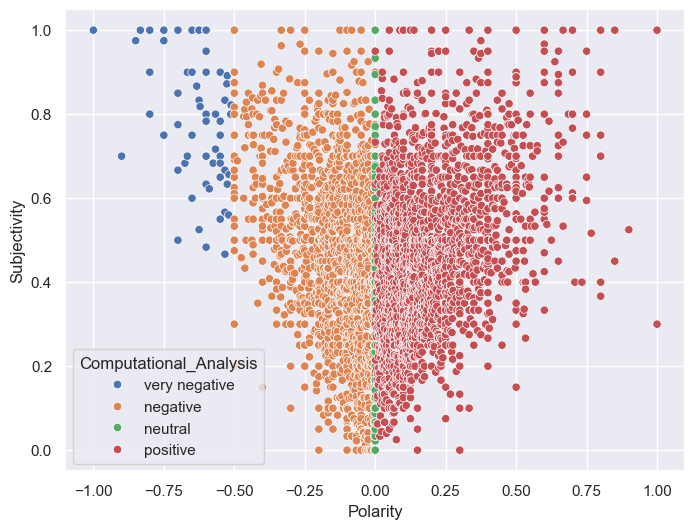

In [82]:
# Plotting our scatter plot
fig, ax = plt.subplots(figsize=(8,6))
sns.scatterplot(x='Polarity', y='Subjectivity', hue='Computational_Analysis', data=sort_data)
plt.show()

In [84]:
# Creating our variables to store each column

import plotly.figure_factory as ff

positive  = sort_data[sort_data.Computational_Analysis=='Positive']
neutral = sort_data[sort_data.Computational_Analysis=='Neutral']
neg = sort_data[sort_data.Computational_Analysis=='Negative']
vneg = sort_data[sort_data.Computational_Analysis=='Very Negative']



hist_data = [positive['length'],neutral['length'] , neg['length'] , vneg['length']]

group_labels = ['Positive', 'Neutral', 'Negative', 'Very Negative']

colors = ['black', 'red']

### Create distplot with curve_type set to 'normal'
fig = ff.create_distplot(hist_data, group_labels, show_hist=False)

### Add title
fig.update_layout(title_text='Length distribution of ham and spam messages',
                 template = 'simple_white')
fig.show()

### Computing percentage of positive, neutral and negative tweets

In [88]:
# Percentage of positive tweets
posTweets = sort_data[sort_data.Computational_Analysis == 'Positive']
posTweets = posTweets['Reviewed_Tweet']
round((posTweets.shape[0]/sort_data.shape[0]*100), 1)



0.0

In [89]:
# Percentage of neutral tweets
neuTweets = sort_data[sort_data.Computational_Analysis == 'Neutral']
neuTweets = neuTweets['Reviewed_Tweet']
round((neuTweets.shape[0]/sort_data.shape[0]*100), 1)



0.0

In [90]:
# Percentage of negative tweets

negTweets = sort_data[sort_data.Computational_Analysis == 'Negative']
negTweets = negTweets['Reviewed_Tweet']
round((negTweets.shape[0]/sort_data.shape[0]*100), 1)



0.0

In [91]:
# Percentage of very negative tweets

vnegTweets = sort_data[sort_data.Computational_Analysis == ' Very Negative']
vnegTweets = vnegTweets['Reviewed_Tweet']
round((vnegTweets.shape[0]/sort_data.shape[0]*100), 1)



0.0

In [94]:
sort_data.Computational_Analysis.value_counts(normalize = True)* 100

Computational_Analysis
neutral          41.232890
positive         35.957638
negative         20.991108
very negative     1.818363
Name: proportion, dtype: float64

### Graphical Representation of Tweet Analysis

<Axes: title={'center': 'Russian vs Ukraine Sentiment Analysis'}, xlabel='General Sentiment Type', ylabel='Count'>

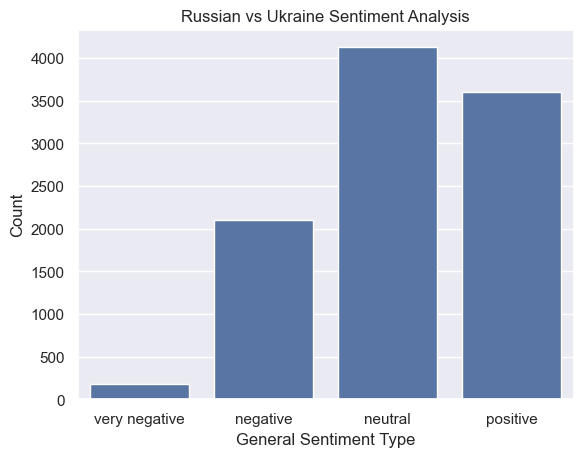

In [98]:
sort_data['Computational_Analysis'].value_counts()
plt.title('Russian vs Ukraine Sentiment Analysis')
plt.xlabel('General Sentiment Type')
plt.ylabel('Count')
sns.countplot(x='Computational_Analysis', data=sort_data)

Text(0.5, 1.0, 'Russians VS Ukraine Sentiment Analysis')

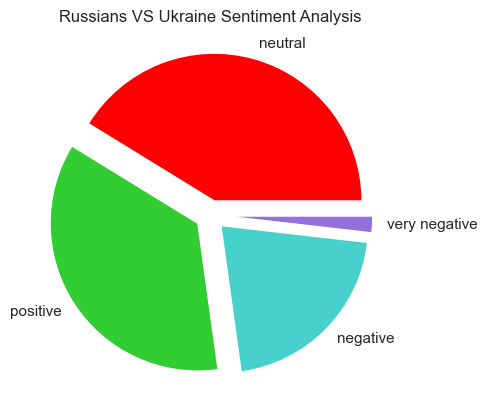

In [99]:
tags = sort_data['Computational_Analysis'].value_counts()

colors = {'mediumturquoise', 'limegreen', 'mediumpurple', 'red'}
explode=(0.1,0.1,0.1,0.1 )

tags.plot(kind = 'pie', explode = explode, colors = colors, label = '')
plt.title('Russians VS Ukraine Sentiment Analysis')



### Emotion Detection

In [100]:
# Using a python library to determine the extent of the person's emotions(e.g. fear, anger, anticipation, ...)
sort_data['emotions'] = sort_data['Reviewed_Tweet'].apply(lambda x: NRCLex(x).affect_frequencies)
sort_data['emotions'].tail(15)


7293                                                                                                                                                                                   {'fear': 0.2, 'anger': 0.0, 'anticip': 0.0, 'trust': 0.2, 'surprise': 0.0, 'positive': 0.2, 'negative': 0.2, 'sadness': 0.0, 'disgust': 0.2, 'joy': 0.0}
6288                                                                            {'fear': 0.0, 'anger': 0.08333333333333333, 'anticip': 0.0, 'trust': 0.25, 'surprise': 0.0, 'positive': 0.25, 'negative': 0.08333333333333333, 'sadness': 0.0, 'disgust': 0.08333333333333333, 'joy': 0.08333333333333333, 'anticipation': 0.16666666666666666}
8328    {'fear': 0.05555555555555555, 'anger': 0.1111111111111111, 'anticip': 0.0, 'trust': 0.1111111111111111, 'surprise': 0.05555555555555555, 'positive': 0.1111111111111111, 'negative': 0.1111111111111111, 'sadness': 0.1111111111111111, 'disgust': 0.05555555555555555, 'joy': 0.1111111111111111, 'anticipation': 0.16666666666

In [102]:
# Removing column with emotions and the extent in dictionaries, extracting the type of emotions from the dictionary,
# concatenating as different columns into sort_data dataframe
sort_data = pd.concat([sort_data.drop(['emotions'],axis=1),
                       sort_data['emotions'].apply(pd.Series)], axis = 1)


In [103]:
sort_data.head()

,tweet,language,length,Reviewed_Tweet,Subjectivity,Polarity,Computational_Analysis,fear,anger,anticip,trust,surprise,positive,negative,sadness,disgust,joy,anticipation
3475,@AndrewYang The Borscht whisperer here. Russia if you listenin I’m walking here I’m walking here. Fucking pathetic,en,116,andrewyang borscht whisperer russia listenin im walking im walking fucking pathetic,1.0,-1.0,very negative,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.333333,0.333333,0.333333,0.000000,NaN
5482,"@BahatiAllyLane @KyivIndependent For the record, in the metaphor, the dying whale is Russia. I'd say bear, but remoras are fish and the metaphor would be lost. Maybe a tick, on a bear, that's about to die a terrible death.",en,223,bahatiallylane kyivindependent record metaphor dying whale russia id say bear remora fish metaphor would lost maybe tick bear thats die terrible death,1.0,-1.0,very negative,0.230769,0.192308,0.0,0.000000,0.038462,0.000000,0.192308,0.192308,0.115385,0.000000,0.038462
8557,"@Pontifex We pray for victory of Ukraine over the forces of evil, that come from Russia.",en,88,pontifex pray victory ukraine force evil come russia,1.0,-1.0,very negative,0.166667,0.111111,0.0,0.111111,0.055556,0.111111,0.111111,0.055556,0.055556,0.111111,0.111111
7355,"@bgcronk @MIPMA1983 @SillyBumble @khamenei_ir Remember, if West Asia stops giving you resources, you'll die, you'll have worst lives than animals, you have nothing You take everything from our countries, then you've the audacity to speak like that? Russia stopped giving gas and Europe is already crippling",en,306,bgcronk mipma sillybumble khameneiir remember west asia stop giving resource youll die youll worst life animal nothing take everything country youve audacity speak like russia stopped giving gas europe already crippling,1.0,-1.0,very negative,0.166667,0.000000,0.0,0.000000,0.000000,0.333333,0.333333,0.166667,0.000000,0.000000,NaN
3965,@PontiacMadeDDG Meanwhile 69 and Jade were in Russia saying fuc Britney griner and laughing. It is very outrageous,en,114,pontiacmadeddg meanwhile jade russia saying fuc britney griner laughing outrageous,1.0,-1.0,very negative,0.000000,0.000000,0.0,0.000000,0.333333,0.333333,0.000000,0.000000,0.000000,0.333333,NaN


### Data cleaning for the new rows added

In [104]:
# Checking for null values
sort_data.isnull().sum()

tweet                        0
language                     0
length                       0
Reviewed_Tweet               0
Subjectivity                 0
Polarity                     0
Computational_Analysis       0
fear                         0
anger                        0
anticip                      0
trust                        0
surprise                     0
positive                     0
negative                     0
sadness                      0
disgust                      0
joy                          0
anticipation              6313
dtype: int64

### Addressing null values and irrelevant columns

In [105]:
# Dropping irrelevant data column -> anticip
sort_data.drop('anticipation', axis = 1, inplace=True)

In [108]:
# Checking the columns in sort_data
sort_data.columns

Index(['tweet', 'language', 'length', 'Reviewed_Tweet', 'Subjectivity',
       'Polarity', 'Computational_Analysis', 'fear', 'anger', 'anticip',
       'trust', 'surprise', 'positive', 'negative', 'sadness', 'disgust',
       'joy'],
      dtype='object')

In [ ]:
# Taking care of null values in anticipation
sort_data['anticipation'] = sort_data['anticipation'].fillna(0)

In [110]:
# Confirming that there are no null values
sort_data.isnull().sum()

tweet                     0
language                  0
length                    0
Reviewed_Tweet            0
Subjectivity              0
Polarity                  0
Computational_Analysis    0
fear                      0
anger                     0
anticip                   0
trust                     0
surprise                  0
positive                  0
negative                  0
sadness                   0
disgust                   0
joy                       0
dtype: int64

In [ ]:
# Overview of dataframe


### Measuring the Correlation between the features

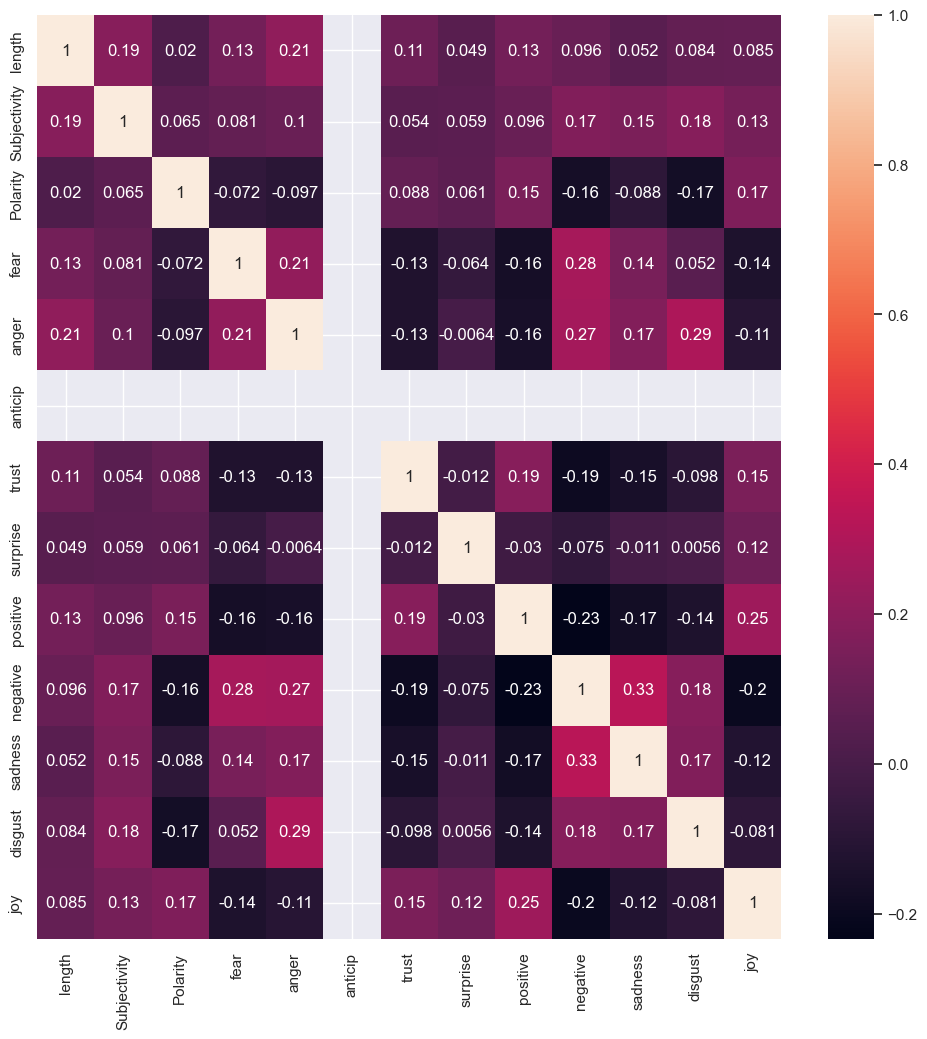

In [111]:
#Plot a correlation matrix
corr_matrix = sort_data.corr(numeric_only=True)
fig,ax = plt.subplots(figsize=(12,12))
sns.heatmap(corr_matrix, annot=True)
plt.show()

#### Is there any correlation? What does our heatmap mean?